In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [5]:
xs = np.array([1,2,3,4,5],dtype=np.float64)
ys = np.array([2,5,4,6,7],dtype=np.float64)

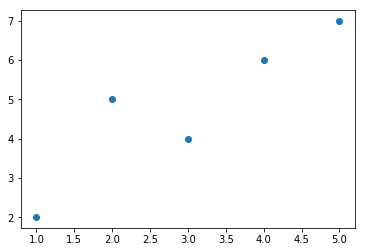

In [6]:
plt.scatter(xs,ys)

In [7]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [8]:
m,b = best_fit_slope_and_intercept(xs,ys)

In [9]:
regression_line = [(m*x)+b for x in xs]

In [10]:
regression_line

[2.599999999999997,
 3.6999999999999984,
 4.8,
 5.900000000000001,
 7.000000000000003]

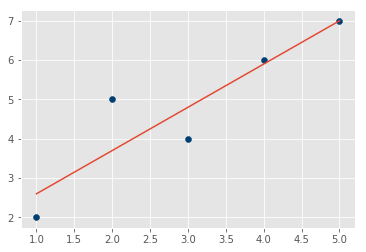

In [20]:
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

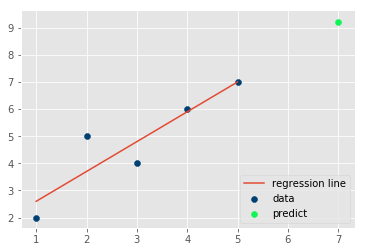

In [22]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.scatter(predict_x,predict_y, color='#0FF555',label='predict')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()


In [25]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [26]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [27]:
e = coefficient_of_determination(ys,regression_line)

In [28]:
e

0.8175675675675675

In [29]:
import random

In [30]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [31]:
x_train, y_train = create_dataset(40,4,2,'pos')

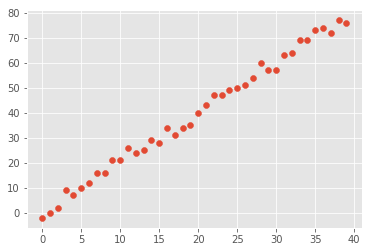

In [32]:
plt.scatter(x_train,y_train)

In [33]:
m,b = best_fit_slope_and_intercept(x_train,y_train)

In [35]:
new_reg_line = [m*each+b for each in x_train]

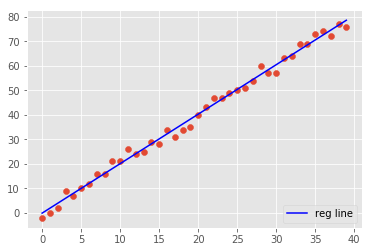

In [45]:
plt.scatter(x_train,y_train)
plt.plot(x_train,new_reg_line,color = '#0000FF',label= "reg line")
plt.legend(loc=4)
plt.show()

In [48]:
cod = coefficient_of_determination(y_train,new_reg_line)

In [49]:
cod

0.9930279645816793